## Deterministic vs. Bayesian (Laplace approximation) neural networks on flat and hierarchical toy data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.toy_data import generate_flat_data, generate_hierarchical_data

## Data: flat or hierarchical

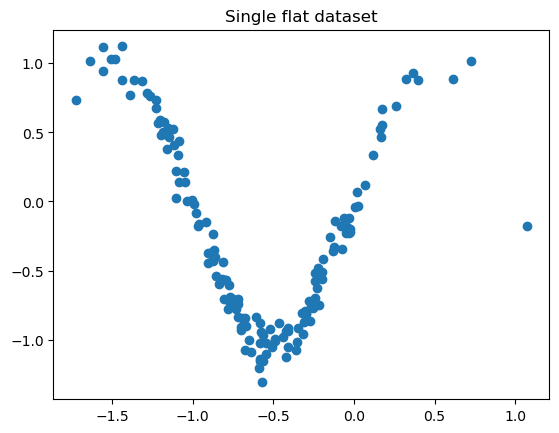

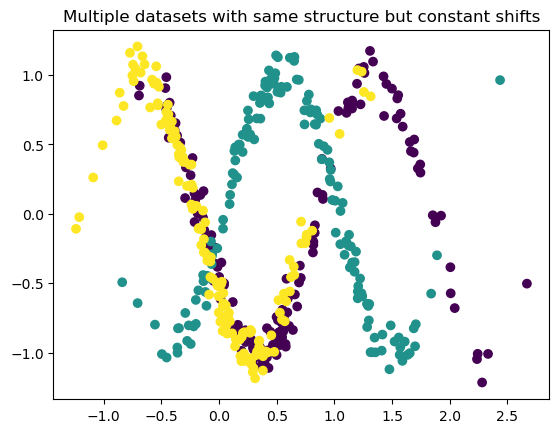

In [2]:
X, Y = generate_flat_data(150)
plt.scatter(X, Y)
plt.title("Single flat dataset")
plt.show()

X, group, Y = generate_hierarchical_data(150, 3)
plt.scatter(X, Y, c=group)
plt.title("Multiple datasets with same structure but constant shifts")
plt.show()

## Deterministic neural networks

In [3]:
%load_ext autoreload
%autoreload 2

import pytorch_lightning as pl

from src.deterministic import (
    # Data modules
    FlatDataModule,
    HierarchicalDataModule,
    # Architectures
    Network,
    HierarchicalWrapper,
    # Optimizers (Lightning modules)
    FlatLightningModule,
    HierarchicalLightningModule,
    # Callbacks
    LogTrainErrorCallback,
    PlotPredictionCallback,
    PlotGroupPredictionCallback,
)

#### Deterministic: Flat

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/lrendsburg/micromamba/envs/birth-weight/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
Missing logger folder: /home/lrendsburg/kaggle/birth-weight/development/laplace/lightning_logs

  | Name  | Type    | Params
----------------------------------
0 | model | Network | 481   
----------------------------------
481       Trainable params
0         Non-trainable params
481       To

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


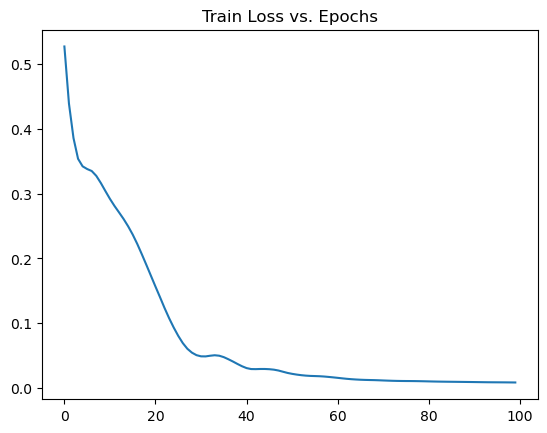

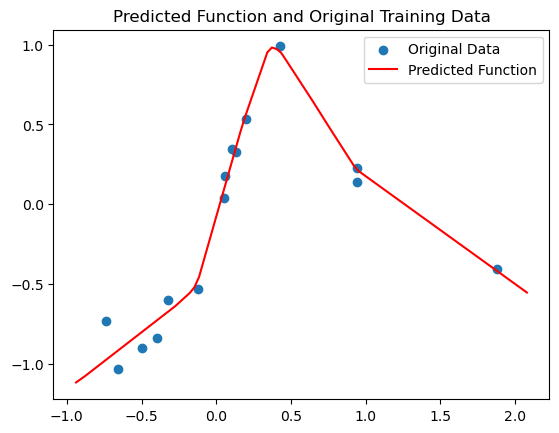

In [4]:
N_SAMPLES = 15
LEARNING_RATE = 1e-2
MAX_EPOCHS = 100

X, Y = generate_flat_data(N_SAMPLES)
data_module = FlatDataModule(X, Y)
model = Network()
lightning_module = FlatLightningModule(model, LEARNING_RATE)

trainer = pl.Trainer(
    max_epochs=MAX_EPOCHS,
    callbacks=[LogTrainErrorCallback(), PlotPredictionCallback(X, Y)],
)
trainer.fit(lightning_module, data_module)

#### Deterministic: Hierarchical

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type                | Params
----------------------------------------------
0 | model | HierarchicalWrapper | 1.9 K 
----------------------------------------------
1.9 K     Trainable params
0         Non-trainable params
1.9 K     Total params
0.008     Total estimated model params size (MB)
/home/lrendsburg/micromamba/envs/birth-weight/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


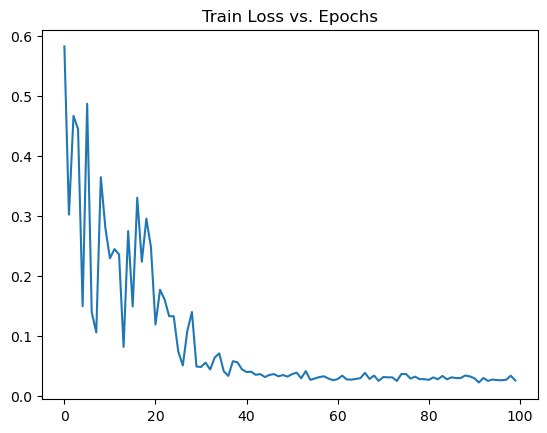

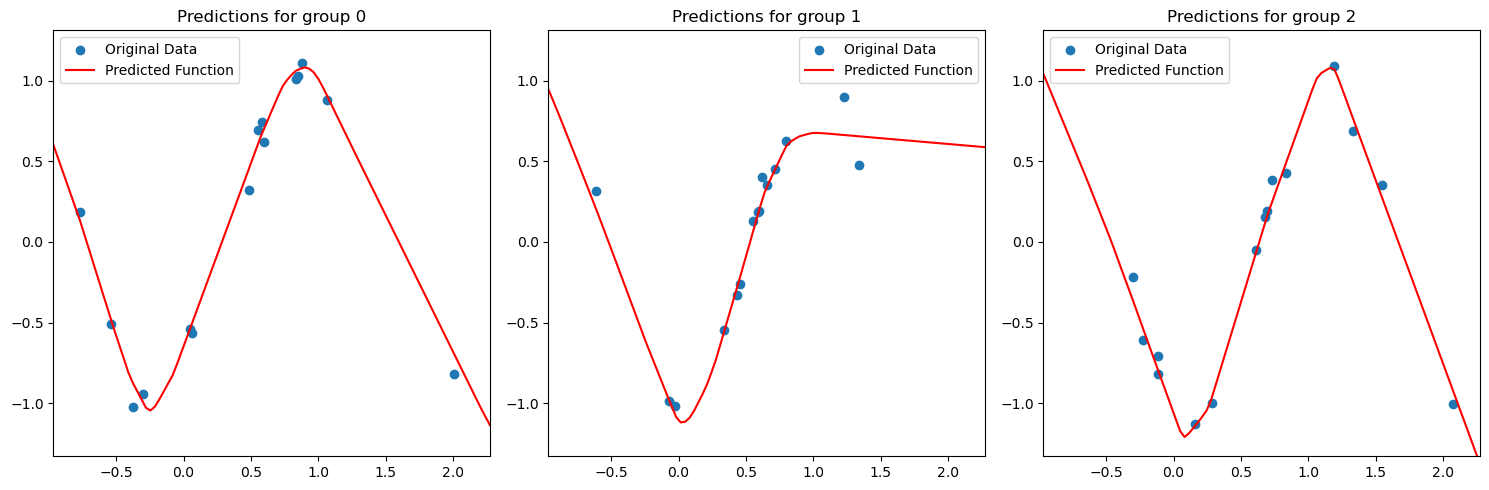

In [5]:
N_SAMPLES = 15
N_GROUPS = 3
LEARNING_RATE = 1e-2
MAX_EPOCHS = 100

WEIGHT_DECAY_GLOBAL = 1e-3
WEIGHT_DECAY_LOCAL = 1e-3

X, group, Y = generate_hierarchical_data(N_SAMPLES, N_GROUPS)
data_module = HierarchicalDataModule(X, group, Y)
model = HierarchicalWrapper(model_class=Network, model_kwargs={}, num_groups=N_GROUPS)
lightning_module = HierarchicalLightningModule(
    model, LEARNING_RATE, WEIGHT_DECAY_GLOBAL, WEIGHT_DECAY_LOCAL
)

trainer = pl.Trainer(
    max_epochs=MAX_EPOCHS,
    callbacks=[LogTrainErrorCallback(), PlotGroupPredictionCallback(X, group, Y)],
)
trainer.fit(lightning_module, data_module)

# Laplace approximation